In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

hi5


y = [1], it's a 'cat' picture.


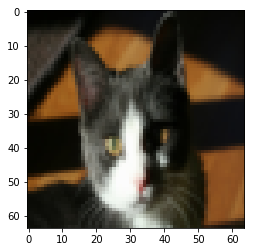

In [3]:
# Example of a picture
index = 19
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [4]:
m_train = train_set_x_orig.shape [0]
print("valores de entrenamiento: "+ str(m_train))
m_test = test_set_x_orig.shape [0]
print("valores de prueba: "+ str(m_test))
num_px = train_set_x_orig.shape [1]
print("tamaño: "+ str(num_px) +"*"+ str(num_px))

valores de entrenamiento: 209
valores de prueba: 50
tamaño: 64*64


In [5]:
train_set_X_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
print("reShape set train: "+ str(train_set_X_flatten.shape))
test_set_X_flatten =test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print("reShape set test: "+ str(test_set_X_flatten.shape))

reShape set train: (12288, 209)
reShape set test: (12288, 50)


In [6]:
train_set_x = train_set_X_flatten/255.
print("train/255, valores: "+ str(len(train_set_x)))
test_set_x = test_set_X_flatten/255.
print("test/255, valores: "+ str(len(test_set_x)))

train/255, valores: 12288
test/255, valores: 12288


In [7]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

cantidad = 5
w,b = initialize_with_zeros(cantidad)
print(w)
print(b)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0


In [8]:
def sigmoid(z):
    s = 1. / ( 1 + np.exp(-z))
    return s

prueba= np.array([0,4])
print(sigmoid(prueba))

[0.5        0.98201379]


In [9]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    
    cost = (-1/m) * np.sum((Y * np.log(A)) + (1-Y) * np.log(1 - A))
    
    dw = (1 / m) * np.dot(X , (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,  "db": db}
    return grads, cost


w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Recuperar las derivadas de grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Actualizar los persos
        ### START CODE HERE ###
        w = w-learning_rate * dw
        b = b-learning_rate* db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [11]:
def prediccion(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = np.rint(A)
    return Y_prediction
print ("prediccion = " + str(prediccion(w, b, X)))

prediccion = [[1. 1. 0.]]


In [12]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
       Argumentos:
    X_train -- Conjunto de entrenamiento representado por una matriz de dimension (num_px * num_px * 3, m_train)
    Y_train -- Etiquetas de entrenamiento representadas por una matriz (vector) de dimension (1, m_train)
    X_test -- conjunto de pruebas representado por una matriz de dimensión (num_px * num_px * 3, m_test)
    Y_test -- etiquetas de prueba representadas por una matriz (vector) de dimension (1, m_test)
    num_iterations -- Hiperparámetro que representa el número de iteraciones para optimizar los parámetros.
    learning_rate -- Hiperparámetro que representa la tasa de aprendizaje 
    print_cost -- Se establece en verdadero para imprimir el costo cada 100 iteraciones
    
    Returns:
    d -- Diccionario que contiene información sobre el modelo.
    """
    
    ### START CODE HERE ###
    
    # Inicializa los parámetros con zeros 
    dim= X_train.shape[0]
    w, b = initialize_with_zeros(dim)
    
    # Gradiente descendiente
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Obtener los parametros w and b de "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Realizar las predicción con los datos de entrenamiento y los datos de prueba)
    Y_prediction_test =  prediccion(w, b, X_test)
    Y_prediction_train = prediccion(w, b, X_train)

    ### END CODE HERE ###
    # Imprimir  el accuracy del modelo
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,  "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, "w" : w, "b" : b,
         "learning_rate" : learning_rate, "num_iterations": num_iterations}
    return d


In [13]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

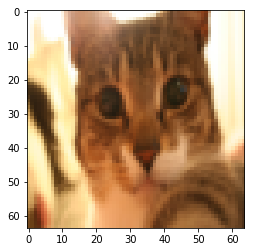

In [14]:
index = 11
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a " + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")


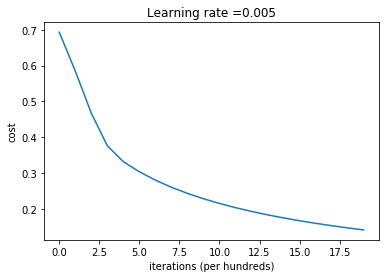

In [15]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


In [16]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)


learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %
learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %
